# Calculate Accuracy, Precision, Recall, and Display Confusion Matrix

**Author:** Lang Min  
**Date:** 2 December 2025  
**Email:** min.la@northeastern.edu  

## 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## 2. Load files

In [2]:
df = pd.read_csv('validation_460.csv')

print("File read successfully.")
print(f'Number of complaints from labeled file: {df.shape[0]}')
print(df.columns.tolist())
print()

y_true = df['Label']
y_pred = df['Answer']

File read successfully.
Number of complaints from labeled file: 460
['Complaint ID', 'Date', 'Product', 'Issue', 'Complaint', 'Answer', 'Explanation', 'Label', 'Category']



## 3. Calculation

tn is 304
fp is 105
fn is 0
tp is 51

Accuracy : 0.772
Precision: 0.327
Recall   : 1.000



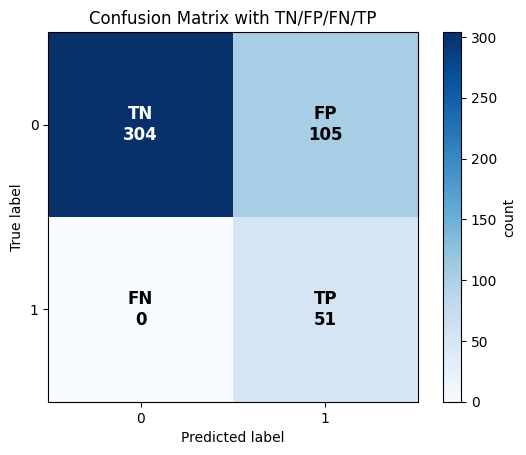

In [3]:
cm_new = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm_new.ravel()   # Unpack the 2×2 confusion matrix into four numbers

# Swap the meaning: now class 0 ("no") is positive
# tp, fn, fp, tn = tn, fp, fn, tp

print(f'tn is {tn}')
print(f'fp is {fp}')
print(f'fn is {fn}')
print(f'tp is {tp}')
print()

accuracy_cm  = (tp + tn) / (tp + tn + fp + fn)
precision_cm = tp / (tp + fp) if (tp + fp) > 0 else 0.0
recall_cm = tp / (tp + fn) if (tp + fn) > 0 else 0.0
print(f"Accuracy : {accuracy_cm:.3f}")
print(f"Precision: {precision_cm:.3f}")
print(f"Recall   : {recall_cm:.3f}")
print()

plt.figure()
plt.imshow(cm_new, cmap="Blues")
plt.colorbar(label="count")

classes = [0, 1]
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)
plt.xlabel("Predicted label")
plt.ylabel("True label")
# plt.title("Confusion Matrix with TP/FN/FP/TN (0='no' is positive)")
plt.title("Confusion Matrix with TN/FP/FN/TP")

# Updated overlay to reflect class 0 as positive
# overlay = [["TP", "FN"],
#            ["FP", "TN"]]

overlay = [["TN", "FP"],
           ["FN", "TP"]]

for i in range(2):
    for j in range(2):
        text = f"{overlay[i][j]}\n{cm_new[i, j]}"
        plt.text(j, i, text,
                 ha="center", va="center",
                 color="white" if cm_new[i, j] > cm_new.max()/2 else "black",
                 fontsize=12, fontweight="bold")

plt.show()

## 4. Analysis

In [4]:
df_check_1 = pd.read_csv('../result_latest/result_0925.csv')
df_check_2 = pd.read_csv('../result_latest/result_0825.csv')
df_check_3 = pd.read_csv('../result_latest/result_0922.csv')
df_check_4 = pd.read_csv('../result_latest/result_0822.csv')

print("File read successfully.")
print(f'0925 - Number of complaints from result file: {df_check_1.shape[0]}')
print(f'0825 - Number of complaints from result file: {df_check_2.shape[0]}')
print(f'0922 - Number of complaints from result file: {df_check_3.shape[0]}')
print(f'0822 - Number of complaints from result file: {df_check_4.shape[0]}')
print()


File read successfully.
0925 - Number of complaints from result file: 7140
0825 - Number of complaints from result file: 10000
0922 - Number of complaints from result file: 3073
0822 - Number of complaints from result file: 3490



In [5]:
unreal_pos_1 = (df_check_1['Answer'].str.lower() == 'yes').sum()
unreal_pos_2 = (df_check_2['Answer'].str.lower() == 'yes').sum()
unreal_pos_3 = (df_check_3['Answer'].str.lower() == 'yes').sum()
unreal_pos_4 = (df_check_4['Answer'].str.lower() == 'yes').sum()

print(f'0925 - AI gave {unreal_pos_1} positives.')
print(f'0825 - AI gave {unreal_pos_2} positives.')
print(f'0922 - AI gave {unreal_pos_3} positives.')
print(f'0822 - AI gave {unreal_pos_4} positives.')
print()

0925 - AI gave 1434 positives.
0825 - AI gave 1957 positives.
0922 - AI gave 807 positives.
0822 - AI gave 987 positives.



In [6]:
real_pos_1 = precision_cm * unreal_pos_1
real_pos_2 = precision_cm * unreal_pos_2
real_pos_3 = precision_cm * unreal_pos_3
real_pos_4 = precision_cm * unreal_pos_4

print(f'0925 - The real number of positive may be {real_pos_1:.0f}')
print(f'0825 - The real number of positive may be {real_pos_2:.0f}')
print(f'0922 - The real number of positive may be {real_pos_3:.0f}')
print(f'0822 - The real number of positive may be {real_pos_4:.0f}')
print()

0925 - The real number of positive may be 469
0825 - The real number of positive may be 640
0922 - The real number of positive may be 264
0822 - The real number of positive may be 323



In [8]:
percent_1 = real_pos_1 / df_check_1.shape[0] * 100
percent_2 = real_pos_2 / df_check_2.shape[0] * 100
percent_3 = real_pos_3 / df_check_3.shape[0] * 100
percent_4 = real_pos_4 / df_check_4.shape[0] * 100

print(f'0925 - Percentage: {percent_1:.3f}%')
print(f'0825 - Percentage: {percent_2:.3f}%')
print(f'0922 - Percentage: {percent_3:.3f}%')
print(f'0822 - Percentage: {percent_4:.3f}%')
print()

0925 - Percentage: 6.566%
0825 - Percentage: 6.398%
0922 - Percentage: 8.585%
0822 - Percentage: 9.246%

